# Project 1 Part 3 - CCM IT Department Survey Analysis
## by Dana Tryon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re
datafile = "MajorsSurveyResults-CleanedFall2023.csv"
df = pd.read_csv(datafile,parse_dates=True)
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Which course are you enrolled in?',
       'ccm_web_site', 'social_media', 'community_event', 'family_or_friend',
       'current_ccm_student', 'ccm_alumni', 'hs_teacher', 'hs_counselor',
       'in_app_advertisement', 'employer', 'billboard', 'television', 'radio',
       'home_mailer', 'other', 'affordable_cost', 'location_convenience',
       'choice_of_programs', 'online_offerings', 'family_friend_referral',
       'faculty_staff', 'college_reputation', 'finacial_aid', 'scholarships',
       'class_sizes', 'extra_curr_opportunities', 'accepted_transfer_credits',
       'negative_exp_at_other_college', 'nj_stars_program',
       'transferablility_of_ccm_credits', 'college_credit_while_in_hs',
       'open_house', 'instant_decision_day', 'on_campus_info_session',
       'titans_tuesday_virtual', 'women_who_dare', 'regional_college_fair',
       'hs_sharetime_info_session', 'challenger_program',
       'cyber_info_protection_program', 'info_session_a

## Question 1 - Which events had students attended prior to coming to CCM? 

In [2]:
#creating a data frame of the 17 possible events
dfq1 = df[['open_house','instant_decision_day','on_campus_info_session','titans_tuesday_virtual',
'women_who_dare','regional_college_fair','hs_sharetime_info_session','challenger_program','cyber_info_protection_program',
'info_session_at_my_hs','campus_visit_with_my_hs','campus_visit_on_my_own','workforce_development_class',
'corporate_training','teen_arts_festival','summer_camp_at_ccm','hour_of_code']]
dfq1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   open_house                     242 non-null    object
 1   instant_decision_day           242 non-null    object
 2   on_campus_info_session         242 non-null    object
 3   titans_tuesday_virtual         242 non-null    object
 4   women_who_dare                 242 non-null    object
 5   regional_college_fair          242 non-null    object
 6   hs_sharetime_info_session      242 non-null    object
 7   challenger_program             242 non-null    object
 8   cyber_info_protection_program  242 non-null    object
 9   info_session_at_my_hs          242 non-null    object
 10  campus_visit_with_my_hs        242 non-null    object
 11  campus_visit_on_my_own         242 non-null    object
 12  workforce_development_class    242 non-null    object
 13  corpo

In [3]:
# Creating a dictionary to contain events attended as keys and affirmative response tallies as values
q1dict={}
affirmative1 = 0
for index in dfq1:    # iterating through each column
    q1dict[index]= affirmative1
    affirmative1 = 0
    #print(index)
    
    for row in dfq1[index]:  # iterating through each row of column to tally affirmative responses
        #print(row)
        if 'Yes' in row:
            affirmative1 += 1
    q1dict[index]= affirmative1   #updating dictionary with column name as key and tallied response as the value
#sorting the original dictionary by values is ascending order
sortedQ1dict = {key: value for key, value in sorted(q1dict.items(),key=lambda item: item[1], reverse=False)}
sortedQ1dict
#converting the dictionary keys and values to lists for use in graphing purposes
x1list = list(sortedQ1dict.keys())
y1list = list(sortedQ1dict.values())

print(x1list)
print(y1list)

['women_who_dare', 'workforce_development_class', 'corporate_training', 'hour_of_code', 'summer_camp_at_ccm', 'challenger_program', 'instant_decision_day', 'cyber_info_protection_program', 'teen_arts_festival', 'regional_college_fair', 'campus_visit_with_my_hs', 'hs_sharetime_info_session', 'titans_tuesday_virtual', 'info_session_at_my_hs', 'on_campus_info_session', 'open_house', 'campus_visit_on_my_own']
[5, 7, 7, 7, 8, 11, 12, 13, 18, 23, 30, 32, 34, 42, 55, 59, 62]


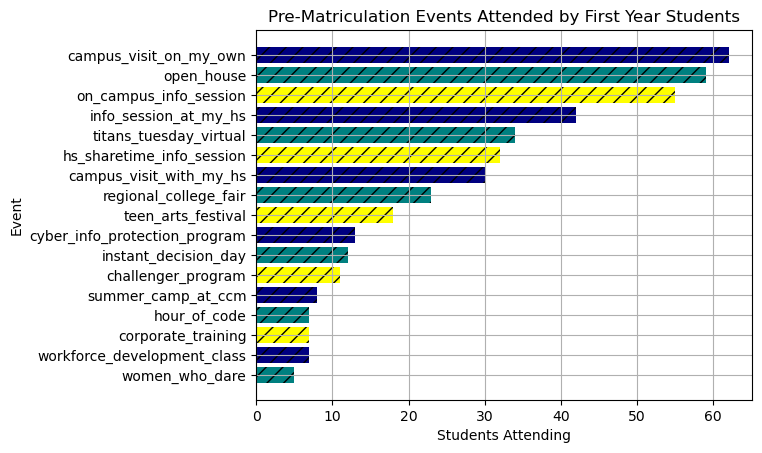

In [39]:
plt.barh(x1list,y1list,color=('teal','navy','yellow'),hatch='//')
plt.title("Pre-Matriculation Events Attended by First Year Students")
plt.xlabel("Students Attending")
plt.ylabel("Event")
plt.grid()

## Question 2 - Which degree programs are students enrolled in? 

In [5]:
# creating a dataframe for the degree program column
dfq2 = df['What degree program are you currently enrolled in?']
dfq2.value_counts()


What degree program are you currently enrolled in?
Computer Science                                   74
Information Technology                             62
Engineering                                        26
ShareTime CSIP Program                             25
Undecided                                          10
CIS Game Development Option                        10
Data Analytics Certificate of Achievement           8
Non Degree seeking                                  8
Challenger Program                                  6
Business Administration                             3
Digital Media Technology                            2
Technical Studies, Applied Associate of Science     2
Economics                                           1
nursing                                             1
Liberal Arts                                        1
Visiting Student                                    1
Culinary Arts and Science                           1
Biology                        

In [6]:
# creating dictionary to tally all degrees
degreeCounts = {}
for degree in dfq2:    # iterating through the rows of the degree column
    if degree in degreeCounts:    #If result equals an existing dictianary key, tally one more.
        degreeCounts[degree] += 1
    else:                         #If result does not equal an existing dictionary key, add result as a new key with a value of 1.
        degreeCounts[degree] = 1
#create a new dictionary that sorts the values of the original dictionary in ascending order
sortedDegreeCounts = {key: value for key, value in sorted(degreeCounts.items(),key=lambda item: item[1], reverse=False)}
sortedDegreeCounts

{'Economics ': 1,
 'nursing': 1,
 'Liberal Arts': 1,
 'Visiting Student': 1,
 'Culinary Arts and Science': 1,
 'Biology': 1,
 'Digital Media Technology': 2,
 'Technical Studies, Applied Associate of Science': 2,
 'Business Administration': 3,
 'Challenger Program': 6,
 'Data Analytics Certificate of Achievement': 8,
 'Non Degree seeking': 8,
 'CIS Game Development Option': 10,
 'Undecided': 10,
 'ShareTime CSIP Program': 25,
 'Engineering': 26,
 'Information Technology': 62,
 'Computer Science': 74}

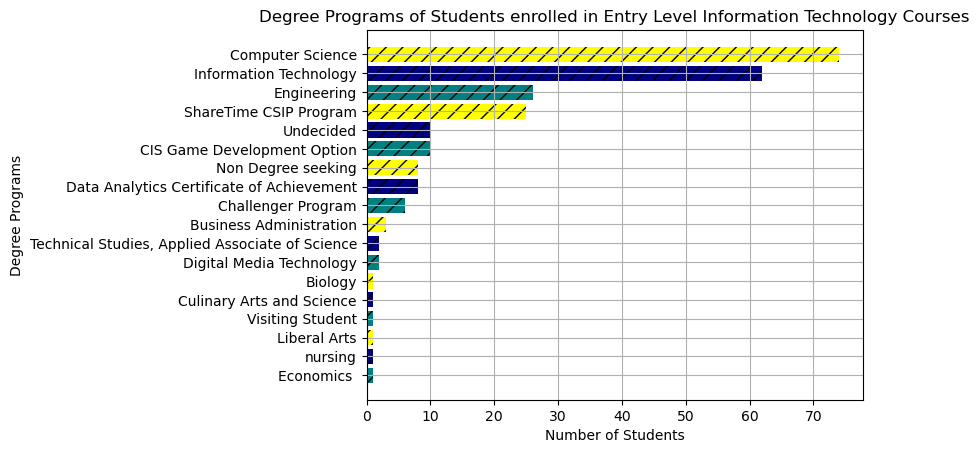

In [38]:
#creating lists for graphing purposes based on the sorted dictionary
x2list = list(sortedDegreeCounts.keys())
y2list = list(sortedDegreeCounts.values())

plt.barh(x2list,y2list,color=('teal','navy','yellow'),hatch='//')
plt.title("Degree Programs of Students enrolled in Entry Level Information Technology Courses")
plt.xlabel("Number of Students")
plt.ylabel("Degree Programs")
plt.grid()

## Question 3 - What were the most effective resources for advertising the CCM Department of Information Technologies?

In [8]:
# creating a data frame of the columns associated with advertisement
dfq3 = df[['ccm_web_site', 'social_media', 'community_event', 'family_or_friend',
       'current_ccm_student', 'ccm_alumni', 'hs_teacher', 'hs_counselor',
       'in_app_advertisement', 'employer', 'billboard', 'television', 'radio',
       'home_mailer', 'other']]
dfq3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ccm_web_site          242 non-null    object
 1   social_media          242 non-null    object
 2   community_event       242 non-null    object
 3   family_or_friend      242 non-null    object
 4   current_ccm_student   242 non-null    object
 5   ccm_alumni            242 non-null    object
 6   hs_teacher            242 non-null    object
 7   hs_counselor          242 non-null    object
 8   in_app_advertisement  242 non-null    object
 9   employer              242 non-null    object
 10  billboard             242 non-null    object
 11  television            242 non-null    object
 12  radio                 242 non-null    object
 13  home_mailer           242 non-null    object
 14  other                 242 non-null    object
dtypes: object(15)
memory usage: 28.5+ KB


In [9]:
# creating a dictionary to contain the advertisement column as the key and the affirmative tally response as the value
q3dict={}
affirmative = 0
for index in dfq3:    # iterating through each column in the dataframe
    q3dict[index]= affirmative
    affirmative = 0
    #print(index)
    
    for row in dfq3[index]:   # iterating through each row in the column to tally the affirmative responses
        #print(row)
        if 'Yes' in row:
            affirmative += 1
    q3dict[index]= affirmative   # updating the dictionary to contain the column name as key and affirmative tally as value
#sorting the original dictionary by values is ascending order       
sortedQ3dict = {key: value for key, value in sorted(q3dict.items(),key=lambda item: item[1], reverse=False)}
sortedQ3dict
#converting the dictionary keys and values to lists for use in graphing purposes
x3list = list(sortedQ3dict.keys())
y3list = list(sortedQ3dict.values())

print(x3list)
print(y3list)

['radio', 'television', 'in_app_advertisement', 'employer', 'billboard', 'other', 'home_mailer', 'community_event', 'social_media', 'ccm_alumni', 'ccm_web_site', 'current_ccm_student', 'hs_teacher', 'hs_counselor', 'family_or_friend']
[6, 9, 10, 14, 20, 36, 40, 47, 52, 72, 86, 102, 112, 126, 168]


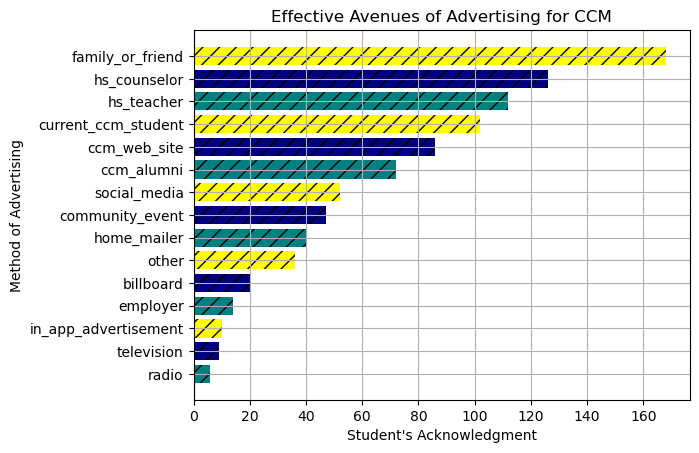

In [37]:
plt.barh(x3list,y3list,color=('teal','navy','yellow'),hatch='//')
plt.title("Effective Avenues of Advertising for CCM")
plt.ylabel("Method of Advertising")
plt.xlabel("Student's Acknowledgment")
plt.grid()

## Question 4 - Which attributes of CCM are the biggest selling points for attending the college?

In [11]:
# creating a data frame of the columns associated with the CCM attributes
dfq4 = df[['affordable_cost', 'location_convenience','choice_of_programs', 'online_offerings', 'family_friend_referral',
       'faculty_staff', 'college_reputation', 'finacial_aid', 'scholarships','class_sizes', 'extra_curr_opportunities', 
       'accepted_transfer_credits','negative_exp_at_other_college', 'nj_stars_program','transferablility_of_ccm_credits',
       'college_credit_while_in_hs']]
filterdfq4 = dfq4.fillna(value='No Impact')  # had to fill in floating point NaN responses with a string 'No Impact' value because   
                                             # the different data type was crashing the search/tally loop 
filterdfq4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   affordable_cost                  242 non-null    object
 1   location_convenience             242 non-null    object
 2   choice_of_programs               242 non-null    object
 3   online_offerings                 242 non-null    object
 4   family_friend_referral           242 non-null    object
 5   faculty_staff                    242 non-null    object
 6   college_reputation               242 non-null    object
 7   finacial_aid                     242 non-null    object
 8   scholarships                     242 non-null    object
 9   class_sizes                      242 non-null    object
 10  extra_curr_opportunities         242 non-null    object
 11  accepted_transfer_credits        242 non-null    object
 12  negative_exp_at_other_college    242

In [12]:
# creating a dictionary to contain the attribue column as the key and the High Impact tally response as the value
q4dict={}
highImpact = 0
for index in filterdfq4:     # iterating through each column in the dataframe
    q4dict[index]= highImpact
    highImpact = 0
    #print(index)
    
    for row in filterdfq4[index]:     # iterating through each row in the column to tally the High Impact responses
        #print(row)
        if 'High Impact' in row:
            highImpact += 1
    q4dict[index]= highImpact   #updating dictionary with column name as key and tallied response as the value
#sorting the original dictionary by values in ascending order
sortedQ4dict = {key: value for key, value in sorted(q4dict.items(),key=lambda item: item[1], reverse=False)}
sortedQ4dict
#converting the dictionary keys and values to lists for use in graphing purposes
x4list = list(sortedQ4dict.keys())
y4list = list(sortedQ4dict.values())

print(x4list)
print(y4list)



['nj_stars_program', 'extra_curr_opportunities', 'negative_exp_at_other_college', 'faculty_staff', 'online_offerings', 'class_sizes', 'accepted_transfer_credits', 'scholarships', 'family_friend_referral', 'college_credit_while_in_hs', 'finacial_aid', 'college_reputation', 'choice_of_programs', 'affordable_cost', 'location_convenience', 'transferablility_of_ccm_credits']
[8, 24, 24, 29, 35, 42, 46, 47, 56, 61, 68, 72, 120, 136, 143, 145]


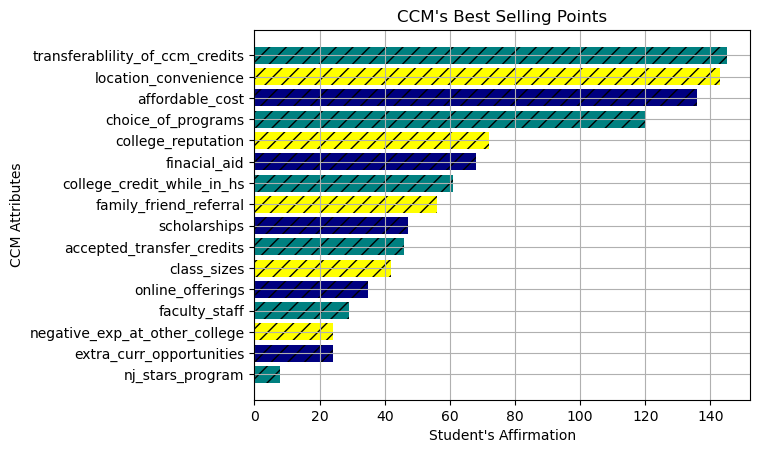

In [36]:
plt.barh(x4list,y4list,color=('teal','navy','yellow'),hatch='//')
plt.title("CCM's Best Selling Points")
plt.ylabel("CCM Attributes")
plt.xlabel("Student's Affirmation")
plt.grid()
